# LT-DSC-Skript


## required libraries 

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from ltdsc_lib import *

Wähle manuell die relevanten Segmentpositionen aus in Form einer Liste. Z.B für Segment 6-8 und 14-16:

`measure_segments = [[6,8],[14,16]]`

In [12]:
measure_segments =  [ [10,12], [18,20]]

thaw_temp_range  =  [ [-57, 10] ] # in °C

## select a single measurement

  Found a valid experiment file. Encoding: UTF-16
  Loading 2.2-5nm
    - loaded measurement 2.2-5nm from 2022-01-06 19:17:00
    - The data contains 5.0 measurements per s


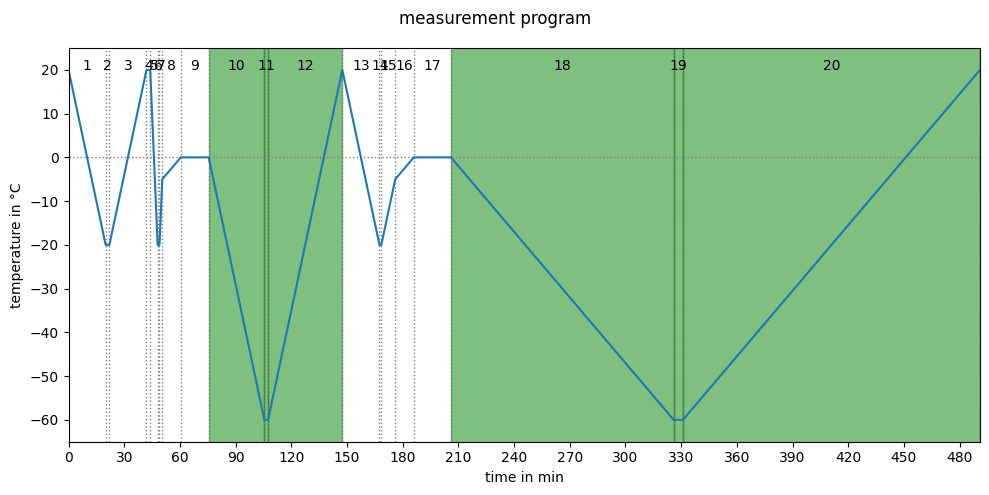

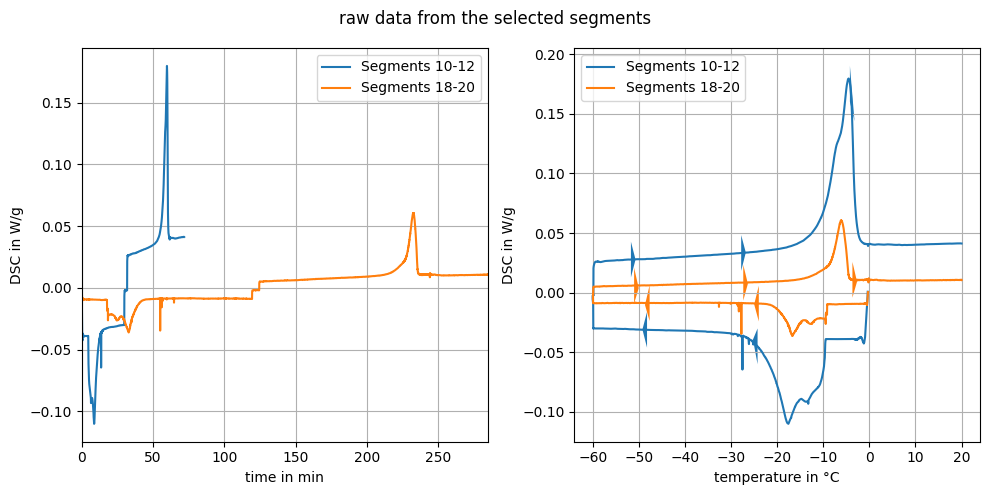

  Segment 12 baseline: y = 0.00040155*x + 0.02643086; R-squared value: 0.97860273
  Segment 20 baseline: y = 0.00003929*x + 0.00583664; R-squared value: 0.42809532


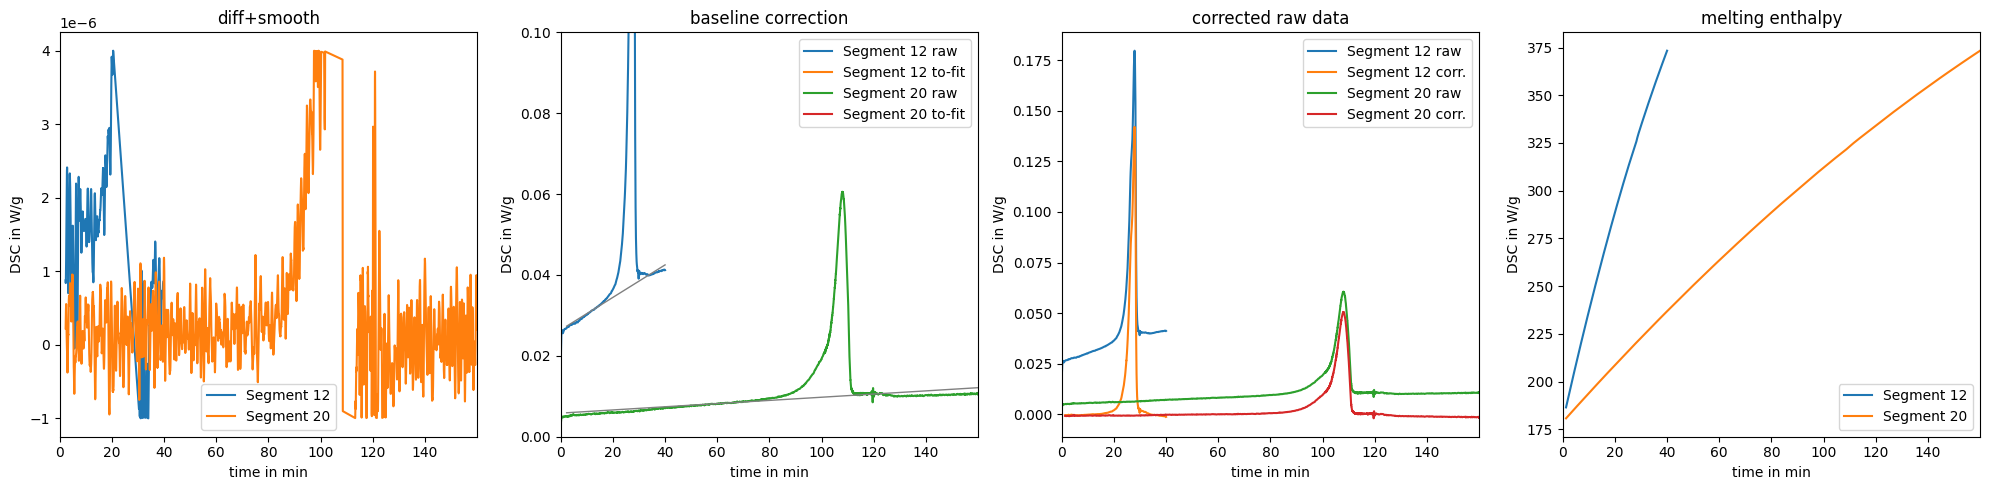

  ice mass in segment 12 between -57 and 10 °C: 68.6 mg/g


IndexError: list index out of range

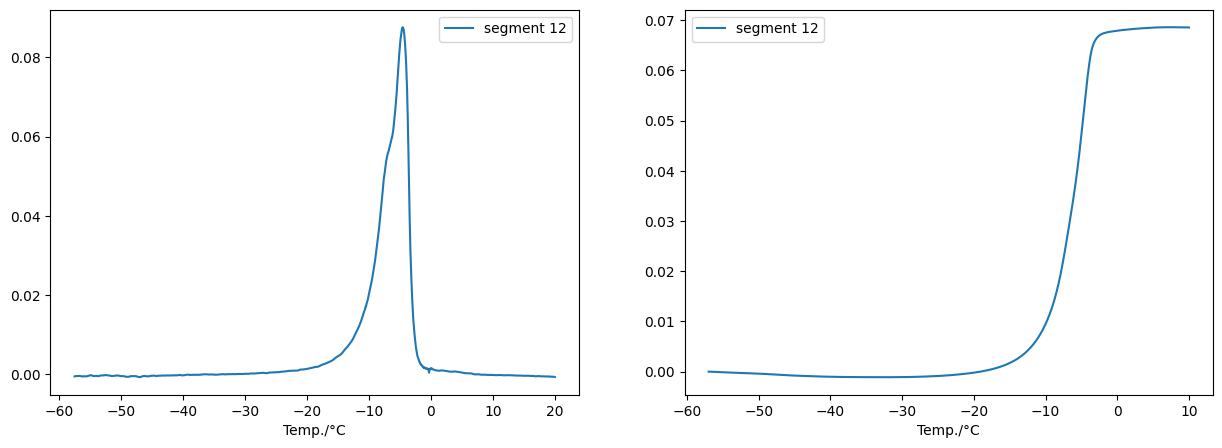

In [13]:
file = select_single_file()
experiment = ltdsc_measurement(file, measure_segments, thaw_temp_range, ignore_first_n_min = 1.25, verbose=True)

## The following code is individual for the selected dataset

4 TXT Dokumente gefunden.

ExpDat_1.1-20nm.txt
  Found a valid experiment file. Encoding: UTF-16
  Loading 1.1-20nm
    - loaded measurement 1.1-20nm from 2022-01-05 09:35:00
    - The data contains 5.0 measurements per s


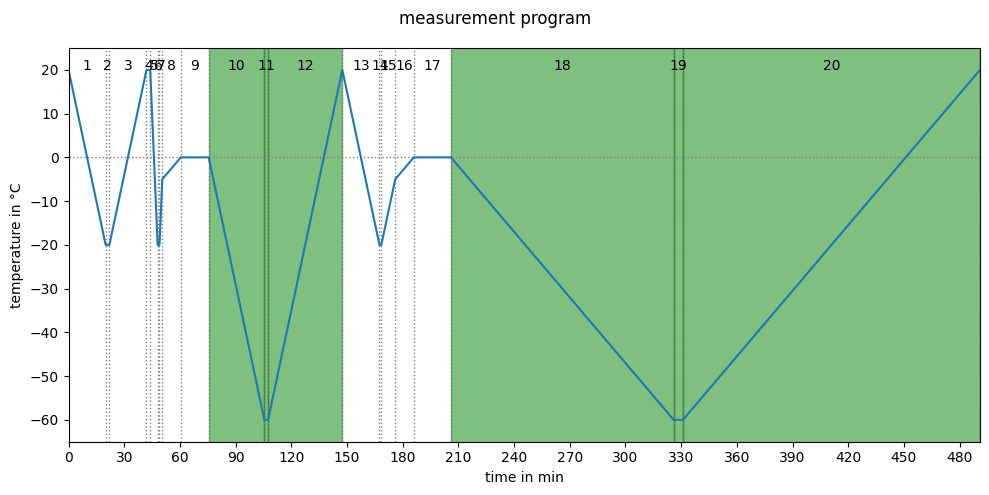

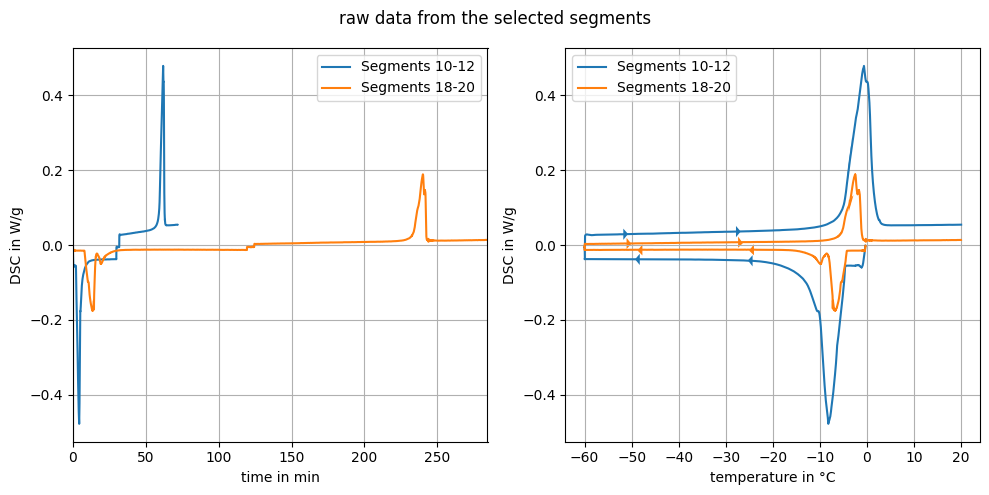

  Segment 12 baseline: y = 0.00077048*x + 0.02485281; R-squared value: 0.98927711
  Segment 20 baseline: y = 0.00006910*x + 0.00324545; R-squared value: 0.96491024


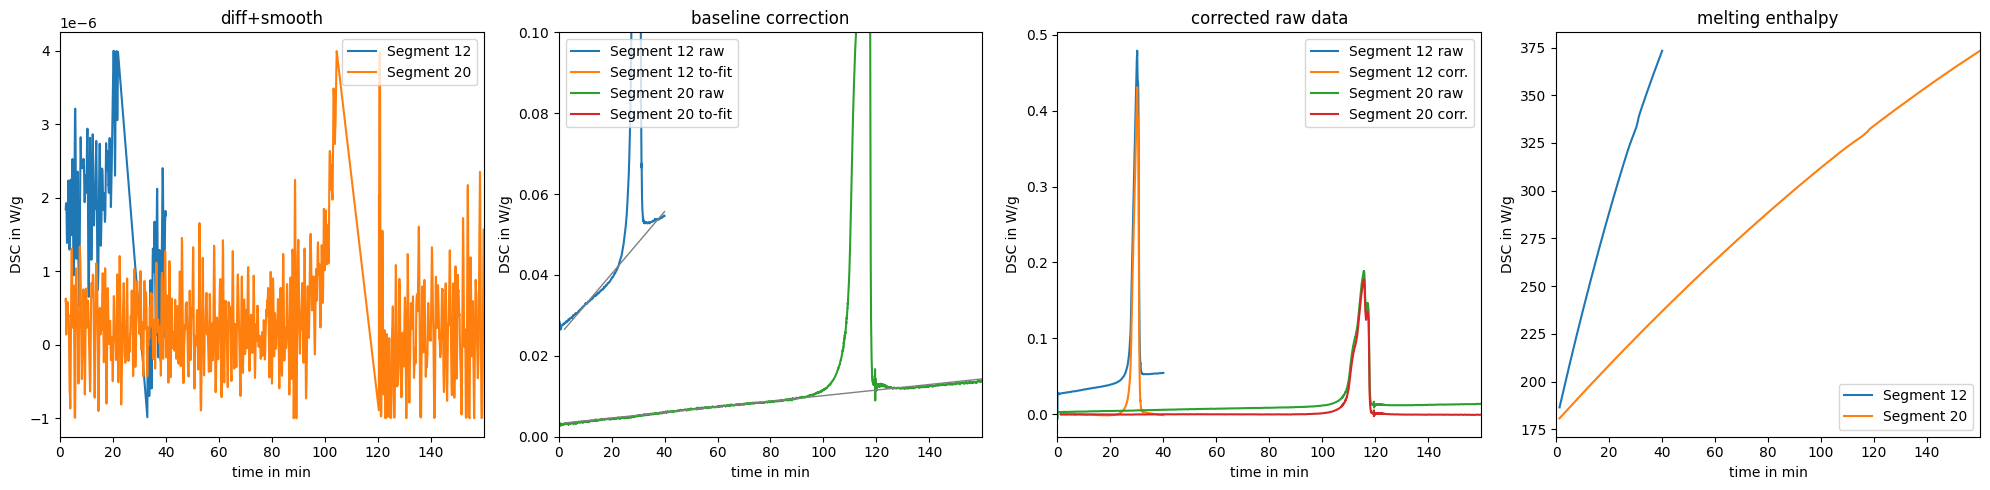

  ice mass in segment 12 between -57 and 10 °C: 177.8 mg/g


IndexError: list index out of range

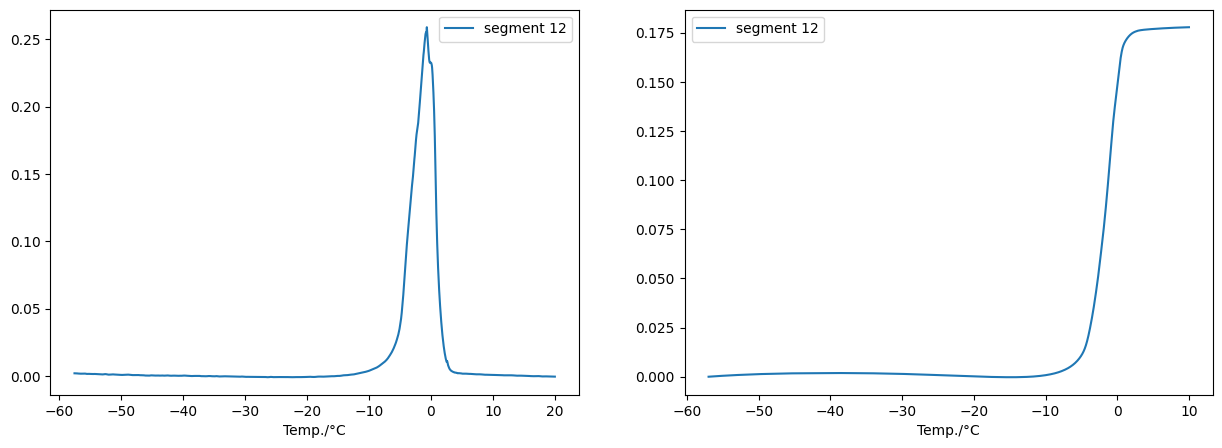

In [14]:
directory, materials = load_multiple_experiments( measure_segments, thaw_temp_range, True )
specimen_ages = ['1d','7d','14d','21d','28d']
ice_dataframe, ice_stat_dataframe = process_ice_mass_dev( materials, specimen_ages )
    

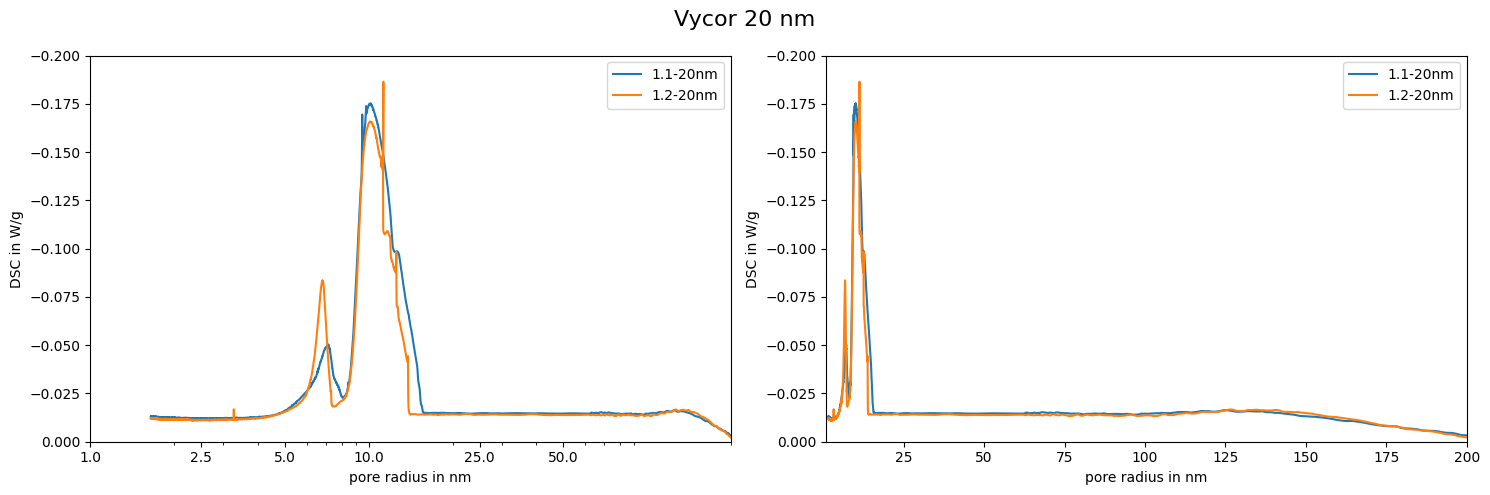

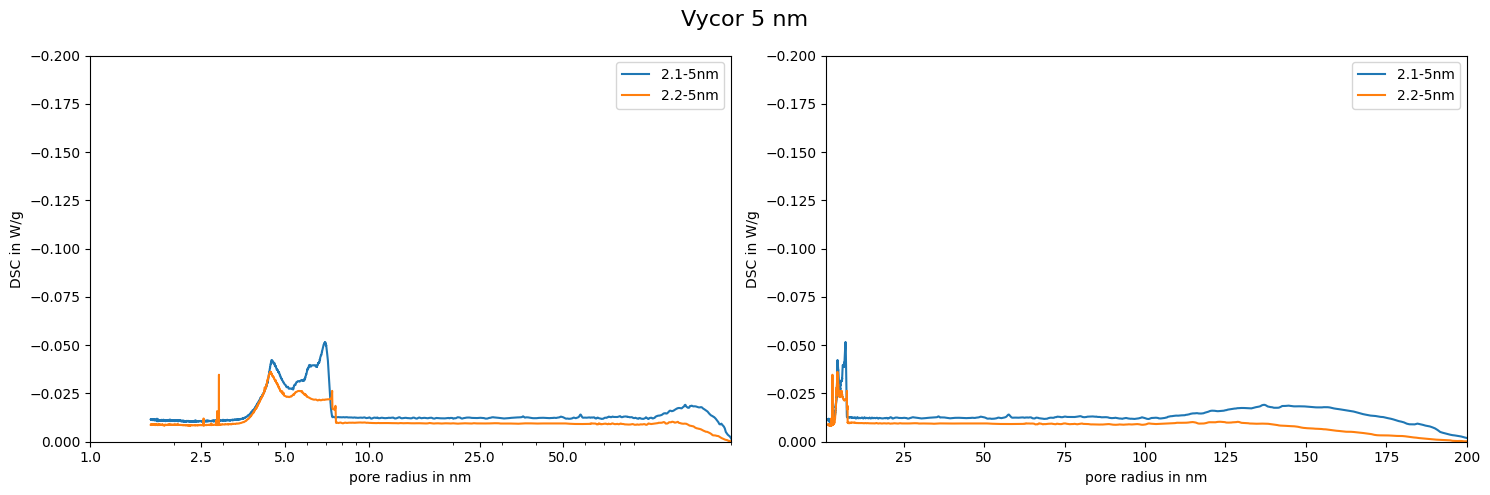

In [11]:

for experiment in materials.keys():
    fig, ax = plt.subplots(ncols=2, figsize=(15, 5))
    fig.suptitle(experiment, fontsize=16)
    for key, data in materials[experiment].items():
        for k, measure_segment in enumerate(measure_segments):
            for i in [0,1]:
                df_s = data.raw_data[(data.raw_data['Segment'] == measure_segment[0])]
                
                df_s.plot(             y='DSC/(mW/mg)', x ='pore radius in nm', ax=ax[i], label=key.format( measure_segment[0] ))
                ax[i].set_ylim(0,-.2)
                ax[i].set_xlim([1,200])
                ax[i].set_xlabel('pore radius in nm')
                ax[i].set_ylabel('DSC in W/g')
    ax[0].set_xscale('log')
    ax[0].set_xticks([1,2.5,5,10,25,50])
    ax[0].get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

    plt.tight_layout()
    plt.show()